In [1]:
import os
import urllib

# Download the data
API_KEY = "PO6RG0NM9390YF3A"
STOCK_SYMBOL = "SPY"
INTERVAL = "1min"
DATA_TYPE = "MONTHLY" # INTRADAY || DAILY || WEEKLY || MONTHLY

if DATA_TYPE == "intraday":
    DOWNLOAD_ROOT = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={STOCK_SYMBOL}&interval={INTERVAL}&apikey={API_KEY}&datatype=csv&ouputsize=full"
else:
    DOWNLOAD_ROOT = f"https://www.alphavantage.co/query?function=TIME_SERIES_{DATA_TYPE}&symbol={STOCK_SYMBOL}&apikey={API_KEY}&datatype=csv&ouputsize=full"
filename = STOCK_SYMBOL+"_"+DATA_TYPE+".csv"
datapath = "rawdata/"
os.makedirs(datapath, exist_ok=True)
urllib.request.urlretrieve(DOWNLOAD_ROOT, datapath+filename)
print('Download complete.')

Download complete.


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime

data = pd.read_csv(datapath + filename, thousands=',')

data = data.iloc[::-1]
print(data)

      timestamp      open      high       low     close      volume
239  2000-06-30  143.6875  149.1562  143.0000  145.2812   127146000
238  2000-07-31  145.4375  151.9843  141.5156  143.0000   106780100
237  2000-08-31  143.6250  153.0937  142.6250  152.3437   102365500
236  2000-09-29  153.2500  153.5937  142.1250  143.6250   113203000
235  2000-10-31  144.2812  145.7500  130.1562  142.9531   178392400
..          ...       ...       ...       ...       ...         ...
4    2020-01-31  323.5400  332.9500  320.3600  321.7300  1389179454
3    2020-02-28  323.3500  339.0800  285.5400  296.2600  2099672006
2    2020-03-31  298.2100  313.8400  218.2600  257.7500  5888710884
1    2020-04-30  247.9800  294.8800  243.9000  290.4800  2798273802
0    2020-05-29  285.3100  306.8400  272.9900  304.3200  1892377275

[240 rows x 6 columns]


In [4]:
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import pandas as pd
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [10]:
nextClose = []
curOpen = []
curClose = []
curHigh = []
curLow = []
curVol = []
for row in range(len(data['open'])-2):
    curOpen.append(data['open'].iloc[row])
    curClose.append(data['close'].iloc[row])
    curHigh.append(data['high'].iloc[row])
    curLow.append(data['low'].iloc[row])
    curVol.append(data['volume'].iloc[row])
    nextClose.append(data['close'].iloc[row+1])
newData = {'open':curOpen, 'close':curClose, 'high':curHigh, 'low':curLow, 'volume':curVol, 'next_day_close':nextClose}
data = pd.DataFrame(newData)
X = data[['open','close','high','low','volume']]
y = data['next_day_close']
print(data)

         open     close      high       low      volume  next_day_close
0    143.6875  145.2812  149.1562  143.0000   127146000        143.0000
1    145.4375  143.0000  151.9843  141.5156   106780100        152.3437
2    143.6250  152.3437  153.0937  142.6250   102365500        143.6250
3    153.2500  143.6250  153.5937  142.1250   113203000        142.9531
4    144.2812  142.9531  145.7500  130.1562   178392400        132.2812
..        ...       ...       ...       ...         ...             ...
231  290.5700  296.7700  302.6300  289.2700  1322797499        303.3300
232  297.7400  303.3300  304.5500  284.8200  1404743524        314.3100
233  304.9160  314.3100  315.4800  304.7400  1035047008        321.8600
234  314.5900  321.8600  323.8000  307.1300  1281220574        321.7300
235  323.5400  321.7300  332.9500  320.3600  1389179454        296.2600

[236 rows x 6 columns]


C:\Users\aboss\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\aboss\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\aboss\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

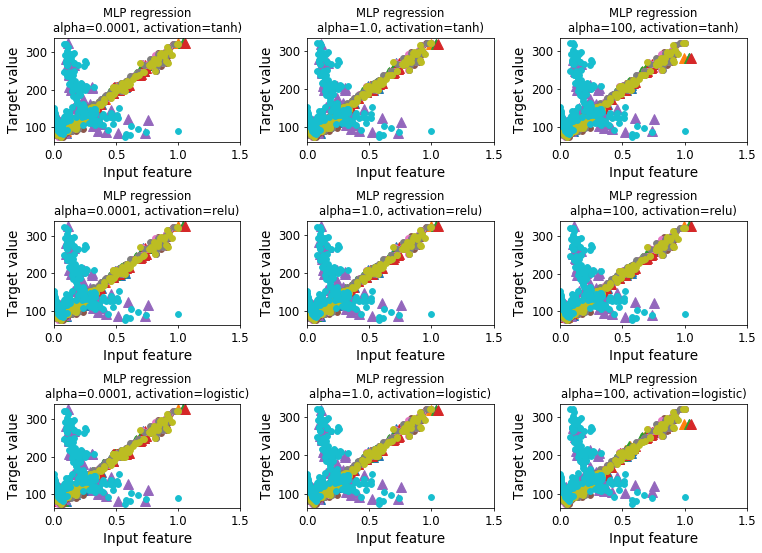

In [43]:
#NO LONGER USELESS STUFF

from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

fig, subaxes = plt.subplots(3, 3, figsize=(11,8), dpi=70)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_predict_input = X_test

for thisaxisrow, thisactivation in zip(subaxes, ['tanh', 'relu', 'logistic']):
    for thisalpha, thisaxis in zip([0.0001, 1.0, 100], thisaxisrow):
        mlpreg = MLPRegressor(hidden_layer_sizes = [100,100],
                             activation = thisactivation,
                             alpha = thisalpha,
                             solver = 'lbfgs').fit(X_train, y_train)
        y_predict_output = mlpreg.predict(X_predict_input)
        thisaxis.set_xlim([0, 1.5])
        thisaxis.plot(X_predict_input, y_predict_output,
                     '^', markersize = 10)
        thisaxis.plot(X_train, y_train, 'o')
        thisaxis.set_xlabel('Input feature')
        thisaxis.set_ylabel('Target value')
        thisaxis.set_title('MLP regression\nalpha={}, activation={})'
                          .format(thisalpha, thisactivation))
        plt.tight_layout()


In [45]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_predict_input = X_test

for thisaxisrow, thisactivation in zip(subaxes, ['tanh', 'relu', 'logistic']):
    for thisalpha, thisaxis in zip([0.0001, 1.0, 100], thisaxisrow):
        mlpreg = MLPRegressor(hidden_layer_sizes = [10,50,70],
                             activation = thisactivation,
                             alpha = thisalpha,
                             solver = 'lbfgs').fit(X_train, y_train)
        y_predict_output = mlpreg.predict(X_predict_input)
        print('Activation: ', thisactivation)
        print('Alpha: ', thisalpha)
        print('R-squared score (training): {:.3f}'.format(mlpreg.score(X_train, y_train)))
        print('R-squared score (test): {:.3f}'.format(mlpreg.score(X_test, y_test)))
        print(' RMSE score (train): {:.3f}'.format(sqrt(mean_squared_error(y_train, mlpreg.predict(X_train)))))
        print('RMSE score (test): {:.3f}\n'.format(sqrt(mean_squared_error(y_test, mlpreg.predict(X_test)))))

C:\Users\aboss\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Activation:  tanh
Alpha:  0.0001
R-squared score (training): 0.922
R-squared score (test): 0.887
 RMSE score (train): 17.523
RMSE score (test): 18.404



C:\Users\aboss\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Activation:  tanh
Alpha:  1.0
R-squared score (training): 0.991
R-squared score (test): 0.985
 RMSE score (train): 5.920
RMSE score (test): 6.604



C:\Users\aboss\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Activation:  tanh
Alpha:  100
R-squared score (training): 0.974
R-squared score (test): 0.981
 RMSE score (train): 10.133
RMSE score (test): 7.465

Activation:  relu
Alpha:  0.0001
R-squared score (training): 0.990
R-squared score (test): 0.983
 RMSE score (train): 6.395
RMSE score (test): 7.117

Activation:  relu
Alpha:  1.0
R-squared score (training): 0.990
R-squared score (test): 0.984
 RMSE score (train): 6.185
RMSE score (test): 6.953



C:\Users\aboss\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Activation:  relu
Alpha:  100
R-squared score (training): 0.989
R-squared score (test): 0.982
 RMSE score (train): 6.488
RMSE score (test): 7.383



C:\Users\aboss\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Activation:  logistic
Alpha:  0.0001
R-squared score (training): 0.993
R-squared score (test): 0.984
 RMSE score (train): 5.129
RMSE score (test): 6.986



C:\Users\aboss\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Activation:  logistic
Alpha:  1.0
R-squared score (training): 0.991
R-squared score (test): 0.985
 RMSE score (train): 5.957
RMSE score (test): 6.736

Activation:  logistic
Alpha:  100
R-squared score (training): 0.965
R-squared score (test): 0.973
 RMSE score (train): 11.785
RMSE score (test): 9.045



C:\Users\aboss\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_predict_input = X_test

for thisaxisrow, thisactivation in zip(subaxes, ['tanh', 'relu', 'logistic']):
    for thisalpha, thisaxis in zip([0.0001, 1.0, 100], thisaxisrow):
        mlpreg = MLPRegressor(hidden_layer_sizes = [100,50],
                             activation = thisactivation,
                             alpha = thisalpha,
                             solver = 'lbfgs').fit(X_train, y_train)
        y_predict_output = mlpreg.predict(X_predict_input)
        print('Activation: ', thisactivation)
        print('Alpha: ', thisalpha)
        print('R-squared score (training): {:.3f}'.format(mlpreg.score(X_train, y_train)))
        print('R-squared score (test): {:.3f}'.format(mlpreg.score(X_test, y_test)))
        print(' RMSE score (train): {:.3f}'.format(sqrt(mean_squared_error(y_train, mlpreg.predict(X_train)))))
        print('RMSE score (test): {:.3f}\n'.format(sqrt(mean_squared_error(y_test, mlpreg.predict(X_test)))))

C:\Users\aboss\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Activation:  tanh
Alpha:  0.0001
R-squared score (training): 0.993
R-squared score (test): 0.983
 RMSE score (train): 5.285
RMSE score (test): 7.200



C:\Users\aboss\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Activation:  tanh
Alpha:  1.0
R-squared score (training): 0.988
R-squared score (test): 0.982
 RMSE score (train): 6.927
RMSE score (test): 7.403



C:\Users\aboss\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Activation:  tanh
Alpha:  100
R-squared score (training): 0.967
R-squared score (test): 0.976
 RMSE score (train): 11.398
RMSE score (test): 8.454



C:\Users\aboss\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Activation:  relu
Alpha:  0.0001
R-squared score (training): 0.991
R-squared score (test): 0.985
 RMSE score (train): 6.100
RMSE score (test): 6.653



C:\Users\aboss\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Activation:  relu
Alpha:  1.0
R-squared score (training): 0.991
R-squared score (test): 0.985
 RMSE score (train): 6.052
RMSE score (test): 6.758



C:\Users\aboss\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Activation:  relu
Alpha:  100
R-squared score (training): 0.989
R-squared score (test): 0.981
 RMSE score (train): 6.484
RMSE score (test): 7.546



C:\Users\aboss\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Activation:  logistic
Alpha:  0.0001
R-squared score (training): 0.993
R-squared score (test): 0.980
 RMSE score (train): 5.205
RMSE score (test): 7.747



C:\Users\aboss\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Activation:  logistic
Alpha:  1.0
R-squared score (training): 0.991
R-squared score (test): 0.985
 RMSE score (train): 5.887
RMSE score (test): 6.707

Activation:  logistic
Alpha:  100
R-squared score (training): 0.955
R-squared score (test): 0.964
 RMSE score (train): 13.234
RMSE score (test): 10.354



C:\Users\aboss\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
